<a href="https://colab.research.google.com/github/aicommons-dev/diet-recommendation--alpha/blob/master/IDyourFood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import and load dataset

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Import neccesary libraries
from fastai import *
from fastai.vision import *

In [ ]:
#Set path
path = Path('/content/drive/My Drive/DSN Hackathon')

In [ ]:
# Data augumentation
transforms=get_transforms(do_flip=True,flip_vert=True,max_rotate=125,max_zoom=1.05,max_warp=0.1)

In [ ]:
# Create databunch object
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='path/c', valid_pct=0.2,
        ds_tfms=transforms, size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.train_ds

LabelList (5442 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Yam and egg sauce,Yam and egg sauce,Yam and egg sauce,Yam and egg sauce,Yam and egg sauce
Path: /content/drive/My Drive/DSN Hackathon

In [ ]:
data.valid_ds

LabelList (1360 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
amala and ewedu,fried potato-yam,moi moi,moi moi,amala and ewedu
Path: /content/drive/My Drive/DSN Hackathon

In [ ]:
# !pip install torch==1.4
# !pip install torchvision==0.5.0

In [ ]:
len(data.classes)

35

In [ ]:
data.classes

['Indomie with vegetables and egg',
 'Jollof rice',
 'No identified Nigerian dish',
 'Rice and stew',
 'Vegetable salad',
 'Yam and egg sauce',
 'Yam pottage',
 'abacha-african salad',
 'akara',
 'amala and ewedu',
 'beans and fried plantain',
 'beans porridge',
 'boiled plantain and sauce',
 'boiled-roasted corn',
 'bread and egg',
 'catfish pepper soup',
 'eba-fufu and afang-vegetable soup',
 'eba-fufu and draw-okra soup',
 'eba-fufu and ogbono soup',
 'eba-fufu and oha soup',
 'fried potato-yam',
 'fried rice',
 'fufu pounded yam and egusi',
 'masa',
 'moi moi',
 'okpa',
 'pap-custard-akamu',
 'plantain and egg sauce',
 'pounded yam and ofe riro',
 'pounded yam-fufu and white soup- ofe nsala',
 'rice and beans',
 'soaked garri, groundnut and sugar',
 'spaghetti',
 'ukwa',
 'yam_potato and beans porridge']

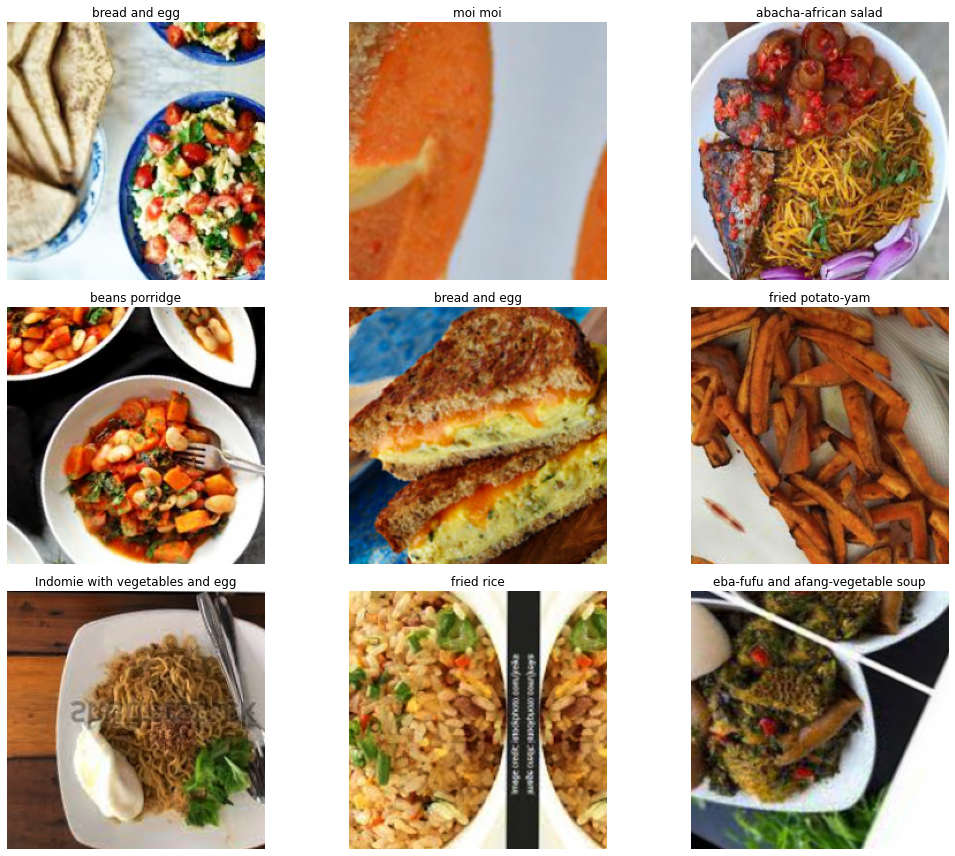

In [ ]:
# Visualize dataset
data.show_batch(rows=3, figsize=(15,12))

## Training Neural network

In [ ]:
learn = cnn_learner(data = data, base_arch = models.resnet34, metrics=accuracy, wd = 0.01)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(10, 7e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.238640,1.400496,0.597794,16:34
1,1.930481,1.387331,0.640441,01:02
2,1.592813,1.470265,0.626471,00:59
3,1.476218,1.352455,0.636029,00:59
4,1.302602,1.321905,0.642647,00:58
5,1.133117,1.048716,0.701471,00:58
6,0.972982,0.912664,0.733088,00:57
7,0.844295,0.860334,0.753676,00:59
8,0.738556,0.816738,0.763971,01:01
9,0.694235,0.809532,0.764706,01:00


In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-06,1e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.655618,0.804502,0.770588,01:05
1,0.662958,0.809010,0.772794,01:02
2,0.654896,0.799095,0.766176,01:03
3,0.633364,0.801629,0.771324,01:03


In [ ]:
learn.freeze()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=3)

[('pounded yam-fufu and white soup- ofe nsala', 'catfish pepper soup', 11),
 ('eba-fufu and draw-okra soup', 'eba-fufu and ogbono soup', 6),
 ('beans and fried plantain', 'beans porridge', 5),
 ('bread and egg', 'moi moi', 5),
 ('pap-custard-akamu', 'moi moi', 5),
 ('Vegetable salad', 'abacha-african salad', 4),
 ('beans porridge', 'beans and fried plantain', 4),
 ('catfish pepper soup', 'pounded yam-fufu and white soup- ofe nsala', 4),
 ('eba-fufu and afang-vegetable soup', 'pounded yam and ofe riro', 4),
 ('rice and beans', 'Rice and stew', 4),
 ('Indomie with vegetables and egg', 'fried rice', 3),
 ('Rice and stew', 'amala and ewedu', 3),
 ('bread and egg', 'fried rice', 3),
 ('eba-fufu and afang-vegetable soup',
  'pounded yam-fufu and white soup- ofe nsala',
  3),
 ('eba-fufu and draw-okra soup', 'eba-fufu and oha soup', 3),
 ('fried rice', 'rice and beans', 3),
 ('fufu pounded yam and egusi', 'pounded yam and ofe riro', 3),
 ('moi moi', 'bread and egg', 3),
 ('pap-custard-akamu',

In [ ]:
defaults.device = torch.device('cpu')

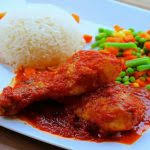

In [ ]:
img = open_image('/content/sample5.jpg')
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'Rice and stew'

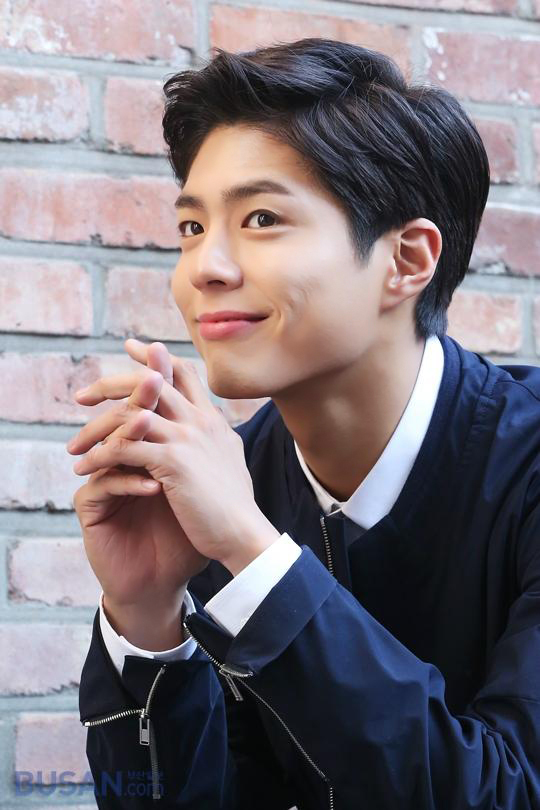

In [ ]:
img = open_image('/content/park-bo-gum-131.jpg')
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'No identified Nigerian dish'

In [ ]:
learn.export()